In [1]:
import os # working environment
import pandas as pd # Data Processing 
import numpy as np # Data Processing 
import matplotlib.pyplot as plt # Visualization of the charts
from sklearn.linear_model import LogisticRegression # Building Logistic Model
from sklearn.model_selection import train_test_split # Splitting Train & Test
import seaborn as sns # Visulaization 
plt.rc("font", size=14) # Setting parameters of Matplot lib charts
sns.set(style="white") # Setting parameters of Matplot lib charts
sns.set(style="whitegrid", color_codes=True) # Setting parameters of Matplot lib charts

In [74]:
os.chdir(R'A:\Work\Course\Analytics\IVY Pro\Python\Part B Data Analysis\Logistic Regression')

In [75]:
os.getcwd()

'A:\\Work\\Course\\Analytics\\IVY Pro\\Python\\Part B Data Analysis\\Logistic Regression'

In [76]:
data_org = pd.read_csv('Banking.csv', header=0)
data = data_org
data = data.dropna()
print(data.shape)
print(list(data.columns))


(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


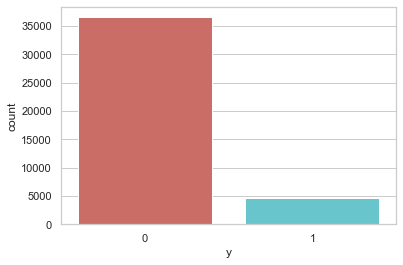

0    36548
1     4640
Name: y, dtype: int64

In [6]:
#Barplot for the dependent variable
sns.countplot(x='y',data=data, palette='hls') # hls = Value Count/ Count Plot
plt.show()
data.y.value_counts()


In [7]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

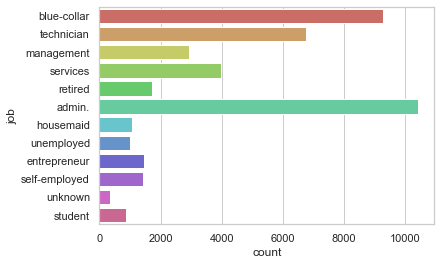

In [8]:
sns.countplot(y="job", data=data,palette='hls')
plt.show()

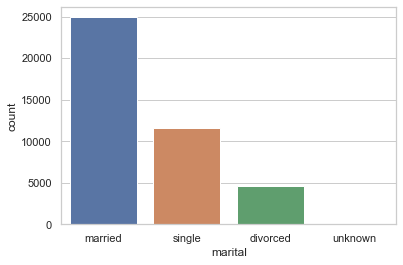

In [9]:
sns.countplot(x="marital", data=data)
plt.show()

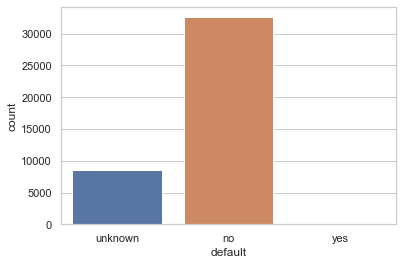

In [10]:
sns.countplot(x="default", data=data)
plt.show()

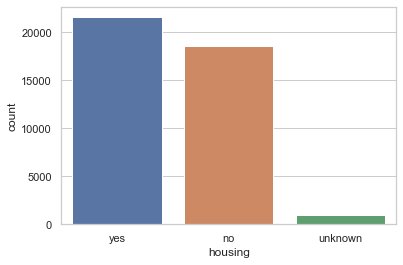

In [11]:
sns.countplot(x="housing", data=data)
plt.show()

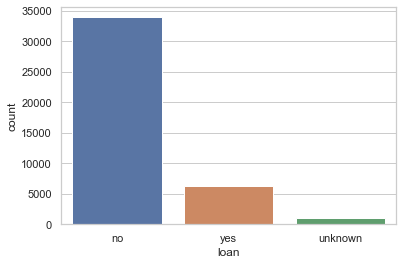

In [12]:
sns.countplot(x="loan", data=data)
plt.show()

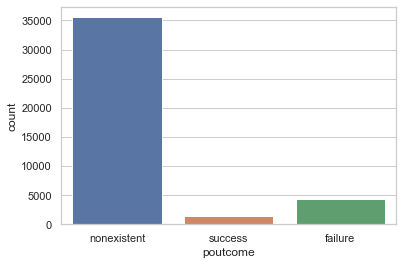

In [13]:
sns.countplot(x="poutcome", data=data)
plt.show()

In [77]:
#Dropping the redant columns
data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

In [78]:
data

,job,marital,default,housing,loan,poutcome,y
0,blue-collar,married,unknown,yes,no,nonexistent,0
1,technician,married,no,no,no,nonexistent,0
2,management,single,no,yes,no,success,1
3,services,married,no,no,no,nonexistent,0
4,retired,married,no,yes,no,success,1
...,...,...,...,...,...,...,...
41183,retired,married,unknown,no,yes,nonexistent,0
41184,housemaid,married,unknown,no,no,nonexistent,0
41185,admin.,single,unknown,yes,yes,nonexistent,0
41186,technician,married,no,no,yes,nonexistent,0


In [16]:
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [33]:
df_job_count = pd.DataFrame({'Job_levels':data.job.value_counts()}).reset_index()

In [36]:
df_job_count

,Job Levels,Frequency
0,admin.,10422
1,blue-collar,9254
2,technician,6743
3,services,3969
4,management,2924
5,retired,1720
6,entrepreneur,1456
7,self-employed,1421
8,housemaid,1060
9,unemployed,1014


In [35]:
df_job_count=df_job_count.rename(columns = {'index':'Job Levels','Job_levels':'Frequency'})

In [41]:
ts = df_job_count.Frequency.sum()

In [38]:
df_job_count = df_job_count.assign(per_freq=df_job_count['Frequency']/df_job_count.Frequency.sum())


In [42]:
df_job_count['lks'] = df_job_count['Frequency']/ts

In [43]:
df_job_count

,Job Levels,Frequency,per_freq,lks
0,admin.,10422,0.253035,0.253035
1,blue-collar,9254,0.224677,0.224677
2,technician,6743,0.163713,0.163713
3,services,3969,0.096363,0.096363
4,management,2924,0.070992,0.070992
5,retired,1720,0.041760,0.041760
6,entrepreneur,1456,0.035350,0.035350
7,self-employed,1421,0.034500,0.034500
8,housemaid,1060,0.025736,0.025736
9,unemployed,1014,0.024619,0.024619


In [44]:
#data['job_new'] = np.where(data['job'].isin(['management','retired','entrepreneur','self-employed','housemaid','unemployed','student','unknown']), "Other", data['job'])

In [79]:
data

,job,marital,default,housing,loan,poutcome,y
0,blue-collar,married,unknown,yes,no,nonexistent,0
1,technician,married,no,no,no,nonexistent,0
2,management,single,no,yes,no,success,1
3,services,married,no,no,no,nonexistent,0
4,retired,married,no,yes,no,success,1
...,...,...,...,...,...,...,...
41183,retired,married,unknown,no,yes,nonexistent,0
41184,housemaid,married,unknown,no,no,nonexistent,0
41185,admin.,single,unknown,yes,yes,nonexistent,0
41186,technician,married,no,no,yes,nonexistent,0


In [47]:
df_job_count = pd.DataFrame({'Job_levels':data.job_new.value_counts()}).reset_index()
df_job_count=df_job_count.rename(columns = {'index':'Job Levels','Job_levels':'Frequency'})
df_job_count = df_job_count.assign(per_freq=df_job_count['Frequency']/df_job_count.Frequency.sum())

In [48]:
df_job_count

,Job Levels,Frequency,per_freq
0,Other,10800,0.262212
1,admin.,10422,0.253035
2,blue-collar,9254,0.224677
3,technician,6743,0.163713
4,services,3969,0.096363


In [80]:
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [81]:
data2

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
41184,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
41185,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
41186,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [82]:
#Drop the unknown columns
data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
data2.columns


Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [83]:
X = data2.iloc[:,1:] #Independent Data

In [84]:
y = data2.iloc[:,0] #Dependent Data

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape
columns = X_train.columns

In [86]:
X_train.shape

(30891, 23)

In [87]:
#1st Step -- calling the instance
classifier = LogisticRegression(random_state=0)
#random state = 0, to ensure that the model is always reproduciable 

In [88]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [90]:
#3rd Step -- predicting y test using x test and trained model(classifier)
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

In [91]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [127]:
y_pred_train = pd.DataFrame(y_pred_train)

In [95]:
Y_PRED.head(20)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [118]:
y_train_prob= pd.DataFrame(y_train_prob)

In [119]:
y_train_prob[1]

0        0.071468
1        0.127980
2        0.083238
3        0.105633
4        0.085514
           ...   
10292    0.105633
10293    0.105633
10294    0.035504
10295    0.105633
10296    0.123272
Name: 1, Length: 10297, dtype: float64

In [120]:
X_train['Probability_Failure'] = y_train_prob[0]

In [104]:
X_train['Class'] = y_pred_train

In [124]:
X_train.drop('Class', axis=1, inplace=True)

In [132]:
X_train = pd.concat([X_train,y_pred_train], axis=1)

In [136]:
X_train.rename({0: 'Class'}, axis=1)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,Probability_Failure,Class
10685,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,0.0
224,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.872020,0.0
29638,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,NaN,1.0
4804,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.914633,0.0
11614,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
30866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
30871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
30883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [139]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)#on test
#y_test=actual; y_pred = predicted
#confusion_matrix_train = confusion_matrix(y_train,y_pred_train)#on train

print(confusion_matrix)
#print(confusion_matrix_train)

[[9046  110]
 [ 912  229]]


In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9156
           1       0.68      0.20      0.31      1141

    accuracy                           0.90     10297
   macro avg       0.79      0.59      0.63     10297
weighted avg       0.88      0.90      0.88     10297



**Precision** is 'True Positive' + 'False Positive' for 1. Means out of my predicted '1' how many are actually correct predicition. Here its 0.68. This means out of total predicted '1' 68% were correct prediction. Now for '0' out of total predicted one 91% were correct

**Recalll** means out of actual values how many were corrected predicted. Here recall of '0' is 0.99. This means if there were 100 zeros then 99 out of them were predicted actually '0'. Similarly recall for '1' is 0.2. This means if there were 10 '1' then only 2 out of them were predicted as '1'.

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr,_=roc_curve(classifier.predict(X_test),y_test,drop_intermediate=False)

import matplotlib.pyplot as plt

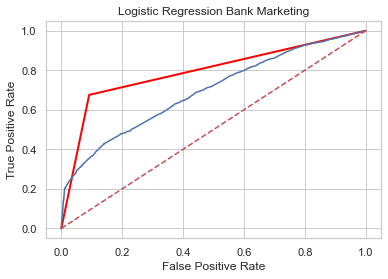

In [142]:
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')


fpr,tpr, thresholds = roc_curve(y_test,classifier.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label='Logistic Regression Bank Marketing')
plt.plot([0,1],[0,1],'r--')#dotted print of the link
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Logistic Regression Bank Marketing')
plt.show()

In [143]:
roc_auc_score(classifier.predict(X_test),y_test)#Area under the curve

0.7919657843177333

**True Positive Rate** means out of total positive values (AKA '1') how many were correctly predicted. 
**False Positive Rate** means that how many'0' were actually predicted '1' put of total '0'

Here we want to see how accurately we are predicting '1'. We want most of '1's to be predicted as '1'. That would give True positive rate, but we want as low as possible '0's to be predicted as '1's. This is given by False positive rate. 

**So if AUC is high that means True positive rate is high while False Positive Rate is very low and our model is very good**